In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tflearn
from tflearn.datasets import cifar10
from tflearn.data_utils import shuffle, to_categorical
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simple CNN model

In [ ]:

(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)


inds = [np.random.choice(range(len(X))) for i in range(36)]
cifar_grid(X ,Y  ,inds, 6)


In [0]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

# Convolutional network building
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

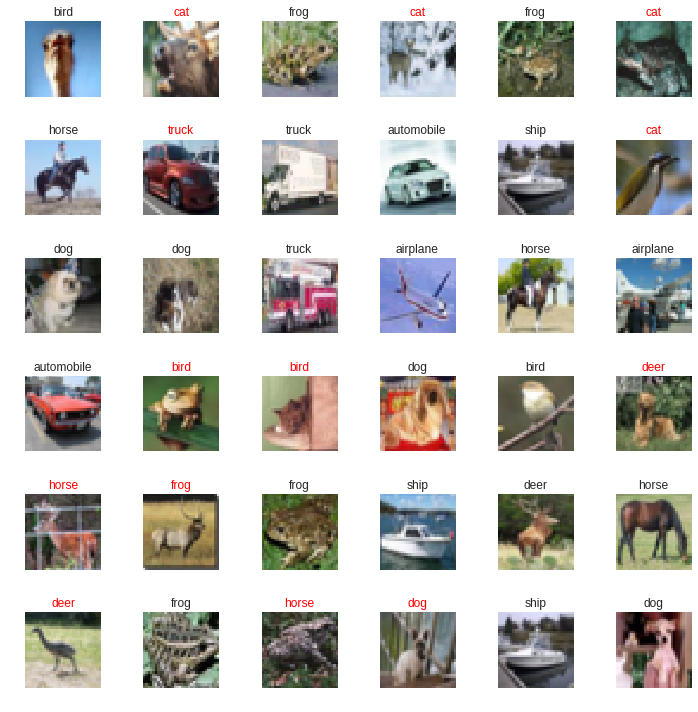

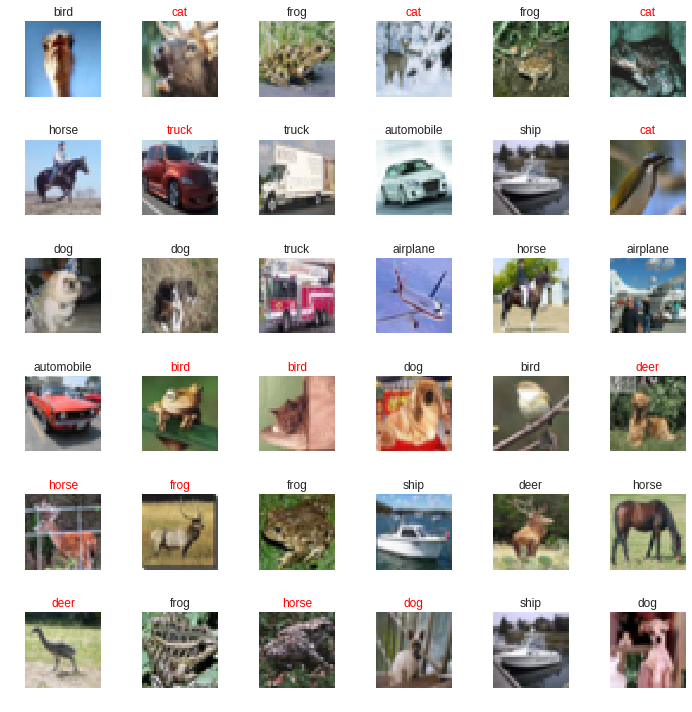

In [18]:

X_test_copy = np.copy(X_test) # copy because predict() modifies input (bug?)
Y_pred = model.predict(X_test_copy)
inds = [np.random.choice(range(len(X_test))) for i in range(36)]
cifar_grid(X_test ,Y_test ,inds,6, Y_pred)